In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vtk_rw import read_vtk
import lmfit
import pandas as pd
from plotting import plot_surf_stat_map, crop_img, plot_surf_label

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


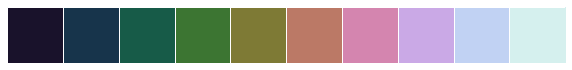

In [3]:
colors = sns.color_palette('cubehelix', 10)
sns.palplot(colors)

### Load data

In [4]:
hemi='lh'

mesh_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_%s_d.vtk'%hemi
sulc_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_%s_d_sulc.npy'%hemi
mask_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/masks/%s_fullmask.npy'%hemi
embed_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/embed/connectivity/%s_smooth_3_embed_10.npy'%hemi
t1_file = '/scr/ilz3/myelinconnect/all_data_on_simple_surf/t1/smooth_3/avg_%s_profiles_smooth_3.npy'%hemi

In [5]:
v,f,d = read_vtk(mesh_file)
mask = np.load(mask_file)
embedding = np.load(embed_file)
t1_profiles = np.load(t1_file)
sulc = np.load(sulc_file)

### Mask and average

In [6]:
t1_profiles[mask]=0
t1_avg = np.mean(t1_profiles[:,3:8], axis=1)

In [7]:
scatter_t1avg = np.delete(t1_avg, mask)
scatter_embed = np.delete(embedding, mask, axis=0)

t1_idx=np.where(scatter_t1avg<=1500)
scatter_t1avg = np.delete(scatter_t1avg, t1_idx)
scatter_embed = np.delete(scatter_embed, t1_idx, axis=0)

### Plot 2D histogramms

In [8]:
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.3)

In [9]:
fc_pos_mask = np.where(scatter_embed[:,0]<0)
fc_neg_mask = np.where(scatter_embed[:,0]>-0)

scatter_embed_pos = np.delete(scatter_embed, fc_pos_mask, axis=0)
scatter_embed_neg = np.delete(scatter_embed, fc_neg_mask, axis=0)

scatter_t1avg_pos = np.delete(scatter_t1avg, fc_pos_mask)
scatter_t1avg_neg = np.delete(scatter_t1avg, fc_neg_mask)

In [10]:
t1_neg_mask = np.where(scatter_t1avg_neg<2050)
scatter_embed_neg_zoom = np.delete(scatter_embed_neg, t1_neg_mask, axis=0)
scatter_t1avg_neg_zoom = np.delete(scatter_t1avg_neg, t1_neg_mask)

In [11]:
t1_neg_mask2 = np.where(scatter_t1avg_neg>2050)
scatter_embed_neg_zoom2 = np.delete(scatter_embed_neg, t1_neg_mask2, axis=0)
scatter_t1avg_neg_zoom2 = np.delete(scatter_t1avg_neg, t1_neg_mask2)

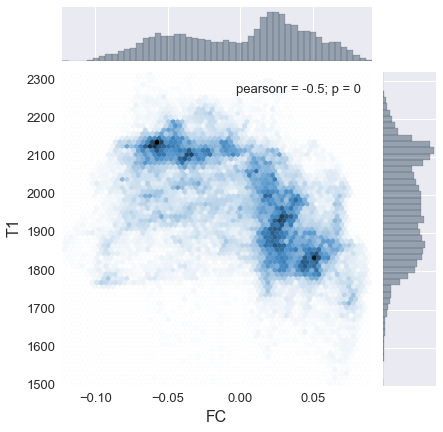

In [12]:
g = sns.jointplot(scatter_embed[:,0], scatter_t1avg, kind="hex", size=6, color=colors[1])
g.set_axis_labels('FC', 'T1', fontsize=16)

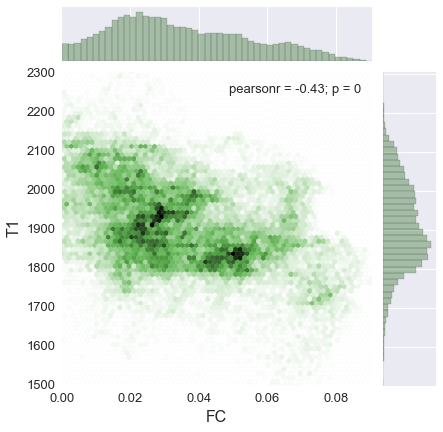

In [13]:
g = sns.jointplot(scatter_embed_pos[:,0], scatter_t1avg_pos, kind="hex", size=6, color=colors[3])
g.set_axis_labels('FC', 'T1', fontsize=16)

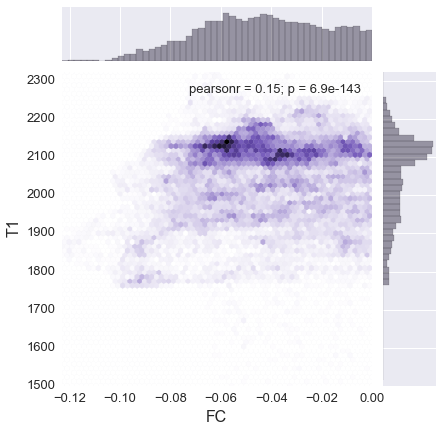

In [14]:
g = sns.jointplot(scatter_embed_neg[:,0], scatter_t1avg_neg, kind="hex", size=6, color=colors[0])
g.set_axis_labels('FC', 'T1', fontsize=16)

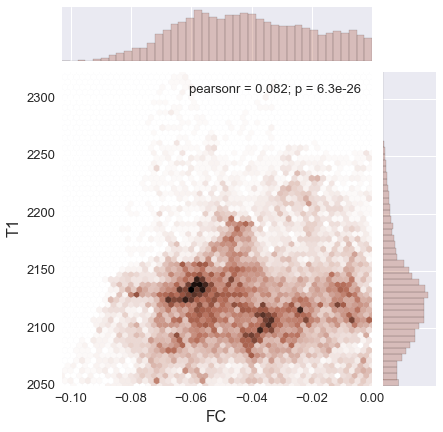

In [15]:
g = sns.jointplot(scatter_embed_neg_zoom[:,0], scatter_t1avg_neg_zoom, kind="hex", size=6, color=colors[5])
g.set_axis_labels('FC', 'T1', fontsize=16)

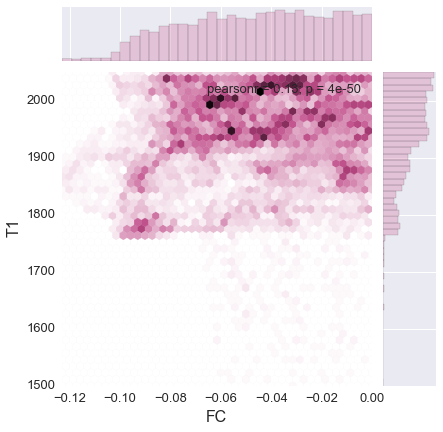

In [16]:
sns.set_style('darkgrid')
g = sns.jointplot(scatter_embed_neg_zoom2[:,0], scatter_t1avg_neg_zoom2, kind="hex", size=6, color=colors[6])
g.set_axis_labels('FC', 'T1', fontsize=16)

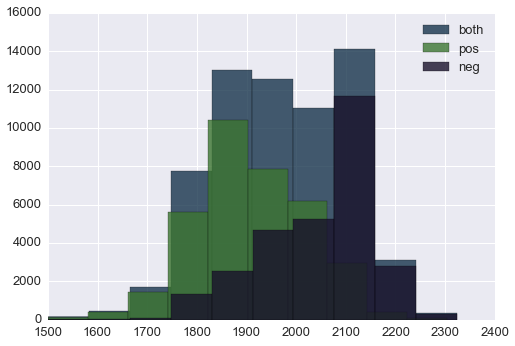

In [17]:
plt.hist(scatter_t1avg,alpha=0.8, color=colors[1], label='both')
plt.hist(scatter_t1avg_pos,alpha=0.8, color=colors[3], label='pos')
plt.hist(scatter_t1avg_neg,alpha=0.8, color=colors[0], label='neg')
plt.legend()

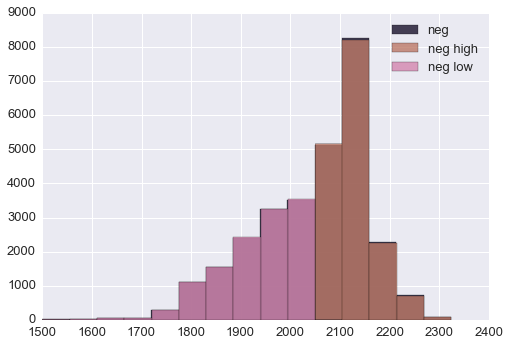

In [18]:
sns.set_style('darkgrid')
plt.hist(scatter_t1avg_neg,alpha=0.8, color=colors[0], label='neg', bins=15)
plt.hist(scatter_t1avg_neg_zoom,alpha=0.8, color=colors[5], label='neg high', bins=5)
plt.hist(scatter_t1avg_neg_zoom2,alpha=0.8, color=colors[6], label='neg low')
plt.legend()

### Stats

In [19]:
import scipy.stats as stats

In [20]:
print 'Divide at FC=0', stats.ttest_ind(scatter_t1avg_neg, scatter_t1avg_pos)
print 'Divide at T1=1950', stats.ttest_ind(scatter_t1avg_neg_zoom, scatter_t1avg_neg_zoom2)

Divide at FC=0 Ttest_indResult(statistic=149.90423785954465, pvalue=0.0)
Divide at T1=1950 Ttest_indResult(statistic=250.6510579536116, pvalue=0.0)


In [21]:
print 'Correlation T1~pos FC', stats.pearsonr(scatter_embed_pos[:,0], scatter_t1avg_pos)
print 'Correlation T1~neg FC', stats.pearsonr(scatter_embed_neg[:,0], scatter_t1avg_neg)
print 'Correlation T1~neg FC, T1>1950', stats.pearsonr(scatter_embed_neg_zoom[:,0], scatter_t1avg_neg_zoom)
print 'Correlation T1~neg FC, T1<1950', stats.pearsonr(scatter_embed_neg_zoom2[:,0], scatter_t1avg_neg_zoom2)


Correlation T1~pos FC (-0.42716454138045251, 0.0)
Correlation T1~neg FC (0.1493483984967087, 6.8976840004817084e-143)
Correlation T1~neg FC, T1>1950 (0.082113570494391705, 6.2776899305053217e-26)
Correlation T1~neg FC, T1<1950 (0.13350543100003315, 3.9859234139398967e-50)


### Where are the clusters?

In [22]:
fc=embedding[:,0]
fc[mask]=0
pos = np.where(embedding[:,0]>0)[0]
neg_low = np.where((embedding[:,0] <0) & (t1_avg <2050))[0]
neg_high = np.where((embedding[:,0] <0) & (t1_avg > 2050))[0]

In [ ]:
sns.set_style('white')
lat=plot_surf_label(v, f, labels=[pos, neg_low, neg_high], bg_map=sulc, bg_on_labels=True, 
                darkness=0.4, figsize=(11,8), azim=0, elev=180, cpal=[colors[3], colors[0], colors[0]])

sns.set_style('white')
med=plot_surf_label(v, f, labels=[pos, neg_low, neg_high], bg_map=sulc, bg_on_labels=True, 
                darkness=0.4, figsize=(11,8), azim=180, elev=180, cpal=[colors[3], colors[0], colors[0]])
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(16, 8)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

In [ ]:
sns.set_style('white')
lat=plot_surf_label(v, f, labels=[pos, neg_low, neg_high], bg_map=sulc, bg_on_labels=True, 
                darkness=0.4, figsize=(11,8), azim=0, elev=180, cpal=[colors[3], colors[6], colors[5]])

sns.set_style('white')
med=plot_surf_label(v, f, labels=[pos, neg_low, neg_high], bg_map=sulc, bg_on_labels=True, 
                darkness=0.4, figsize=(11,8), azim=180, elev=180, cpal=[colors[3], colors[6], colors[5]])
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(16, 8)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

### Model

In [36]:
def custom_plot(x, y, res, xlabel=None, ylabel=None, label=None, data_color=colors[1]):
    fig=plt.figure(figsize=(12,5))
    fig.add_subplot(121)
    plt.plot(x, y, alpha=0.1, marker='.', linestyle='None', color=data_color)
    plt.plot(x, res.best_fit, color='black', linestyle='None', marker='.', markersize=.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig.add_subplot(122)
    res.plot_residuals(data_kws={'alpha':0.1, 'color':'grey', 'marker':'.'}, fit_kws={'color':'k', 'linewidth':2})
    plt.suptitle(label)
    
def custom_report(res, label):
    print label ###
    #print res.fit_report()
    print 'BIC', res.bic
    print 'AIC', res.aic
    print ''
    
def fit_simple(model, x, y, xlabel, ylabel, label, color):
    
    pars = model.guess(y, x=x)
    out = model.fit(y, pars, x=x)
    
    custom_report(out, label)
    custom_plot(x,y, out, xlabel=xlabel, ylabel=ylabel, label=label, data_color=color)
    
    return out


def fit_composite_const(model, x, y, xlabel, ylabel, label, color):
    
    const_model = lmfit.models.LinearModel(prefix='const_')
    const_model.set_param_hint(name='slope', value=0, vary=False)
    comp_model = model + const_model
    
    pars = const_model.make_params(intercept=y.min())
    pars += model.guess(y, x=x)
    out = comp_model.fit(y, pars, x=x)
    
    custom_report(out, label)
    custom_plot(x,y, out, xlabel=xlabel, ylabel=ylabel, label=label, data_color=color)
    
    return out

### Pos FC: Polynomial model degree 0 to 7

Degree 0
BIC 336344.457044
AIC 336335.977337

Degree 1
BIC 329186.527734
AIC 329169.568319

Degree 2
BIC 329141.513496
AIC 329116.074373

Degree 3
BIC 328900.316037
AIC 328866.397206

Degree 4
BIC 328894.41424
AIC 328852.015703

Degree 5
BIC 328901.62715
AIC 328850.748904

Degree 6
BIC 328881.633221
AIC 328822.275268

Degree 7
BIC 328506.043478
AIC 328438.205818



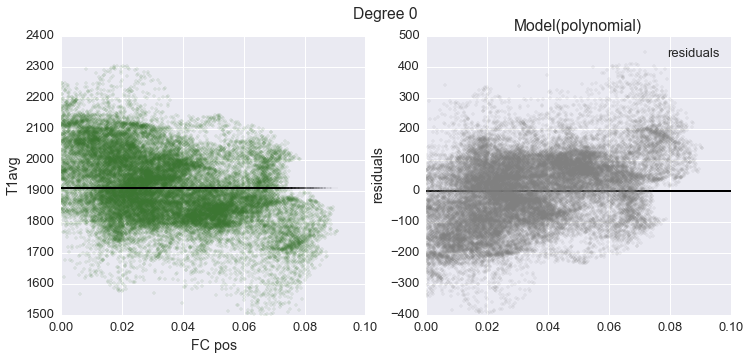

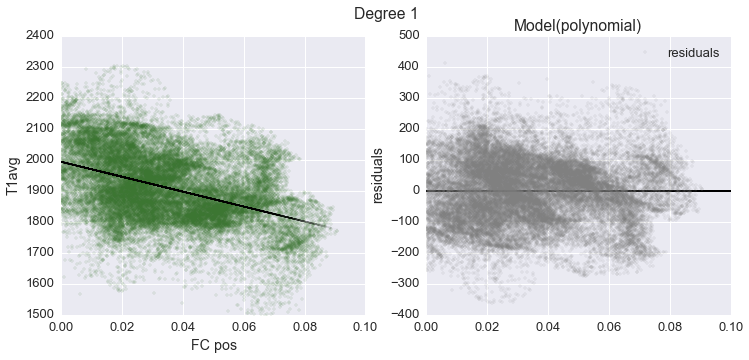

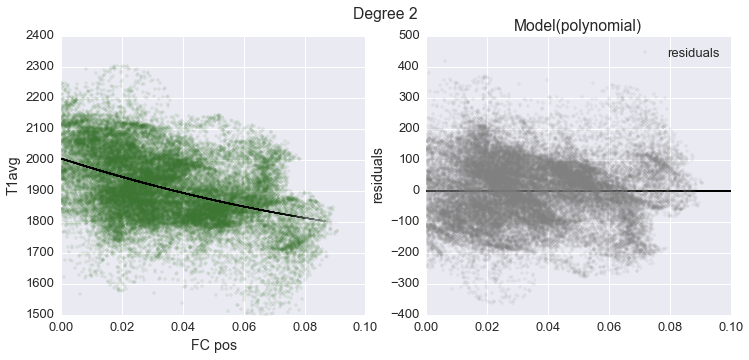

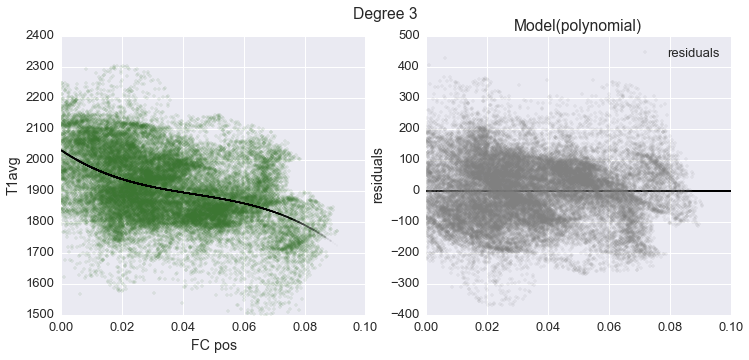

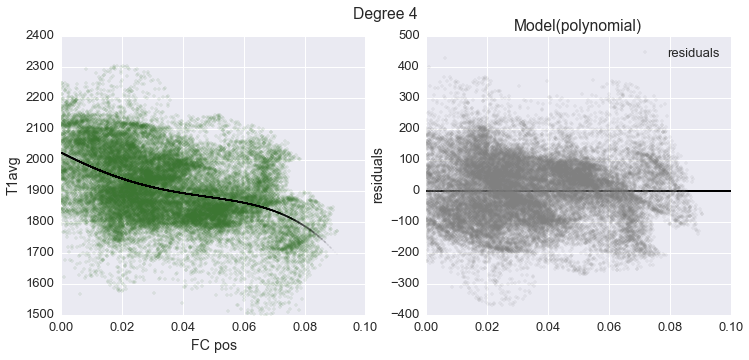

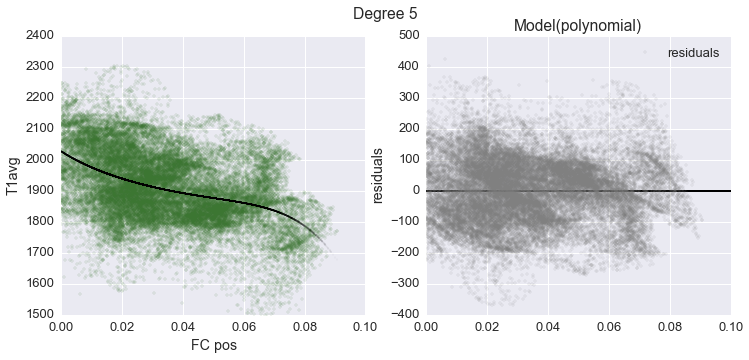

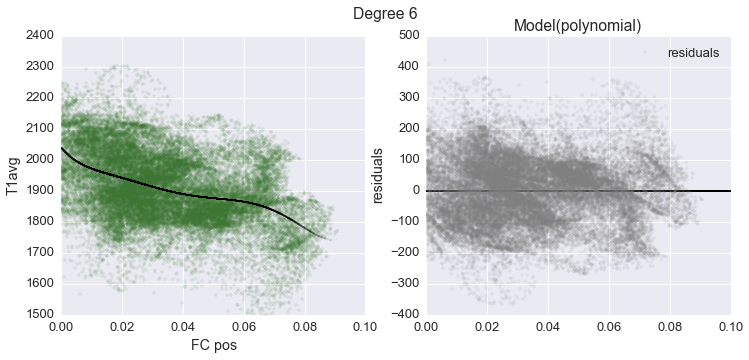

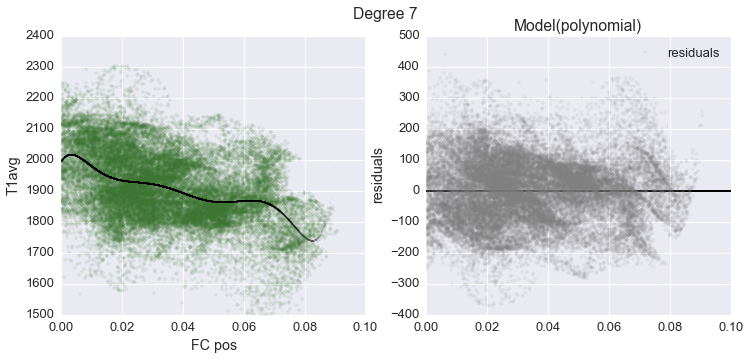

In [37]:
res_pos = []
for p in range(8):

    mod_pos = fit_simple(lmfit.models.PolynomialModel(degree=p), 
                        x=scatter_embed_pos[:,0], y=scatter_t1avg_pos,
                        xlabel='FC pos',
                        ylabel='T1avg',
                         label='Degree %i'%p, 
                        color=colors[3])
    res_pos.append(mod_pos)
    
    


### Pos FC: Step functions plus constant

Step form linear
BIC 329209.48732
AIC 329175.568489

Step form atan
BIC 329124.235675
AIC 329090.316844

Step form logistic
BIC 329135.688087
AIC 329101.769257

Step form erf
BIC 329137.270484
AIC 329103.351654



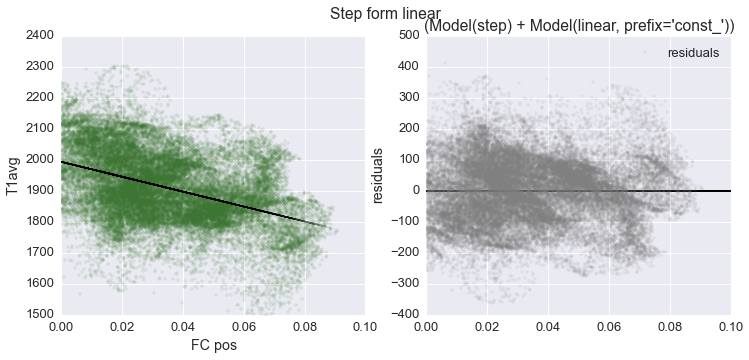

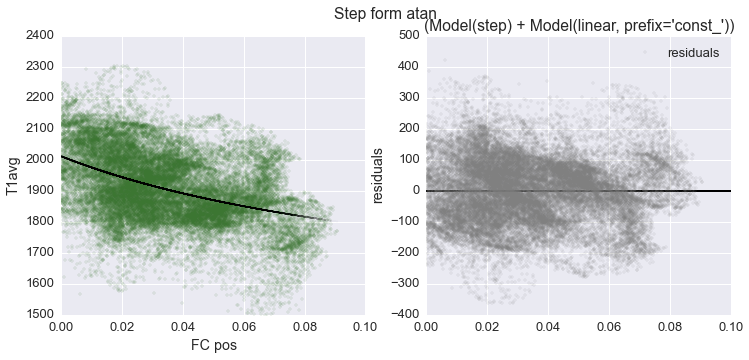

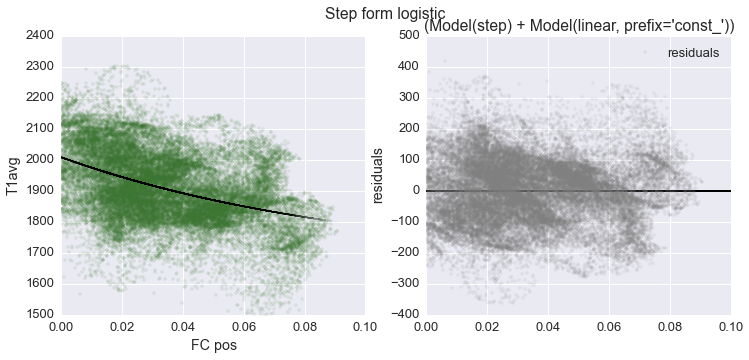

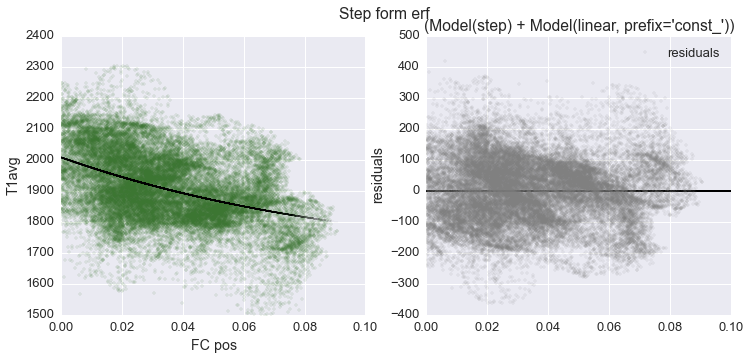

In [38]:
for f in ['linear', 'atan', 'logistic', 'erf']:

    mod_pos = fit_composite_const(lmfit.models.StepModel(form=f), 
                                    x=scatter_embed_pos[:,0], y=scatter_t1avg_pos,
                                    xlabel='FC pos',
                                    ylabel='T1avg',
                                    label='Step form %s'%f, 
                                    color=colors[3])
    
    res_pos.append(mod_pos)

### Neg FC, high T1: Polynomial degree 0-7

Degree 0
BIC 123603.324352
AIC 123595.619804

Degree 1
BIC 123503.129363
AIC 123487.720266

Degree 2
BIC 123295.220509
AIC 123272.106863

Degree 3
BIC 123287.738664
AIC 123256.92047

Degree 4
BIC 123287.854805
AIC 123249.332062

Degree 5
BIC 123280.207797
AIC 123233.980505

Degree 6
BIC 123276.722146
AIC 123222.790305

Degree 7
BIC 123264.703482
AIC 123203.067093



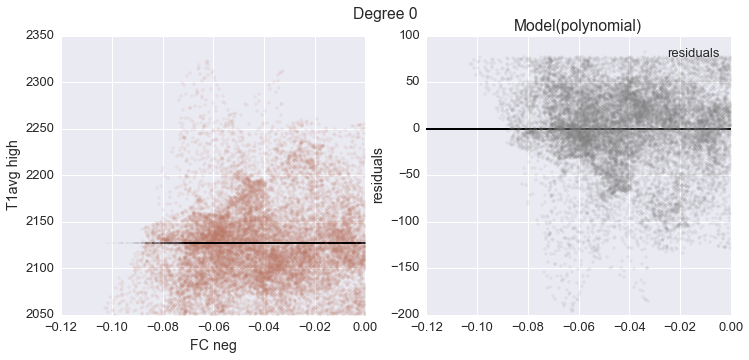

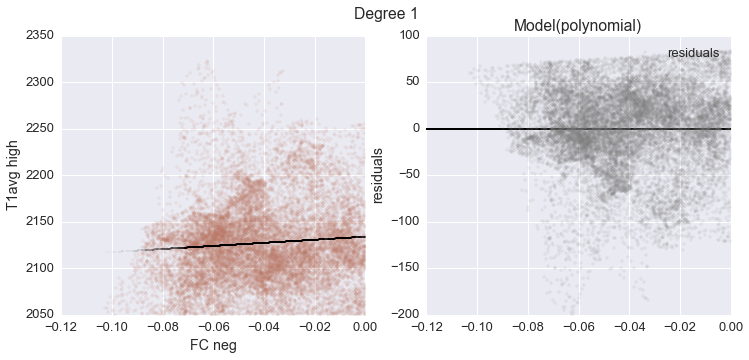

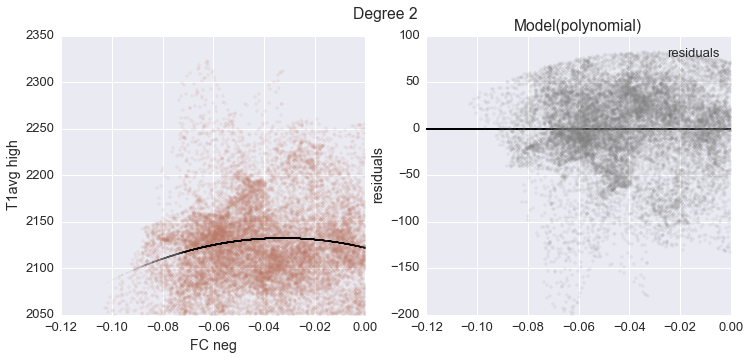

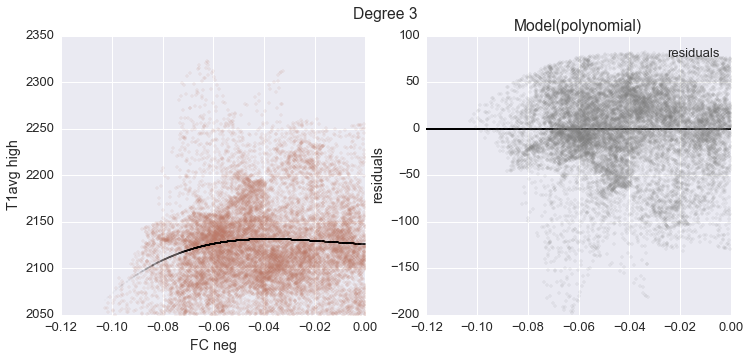

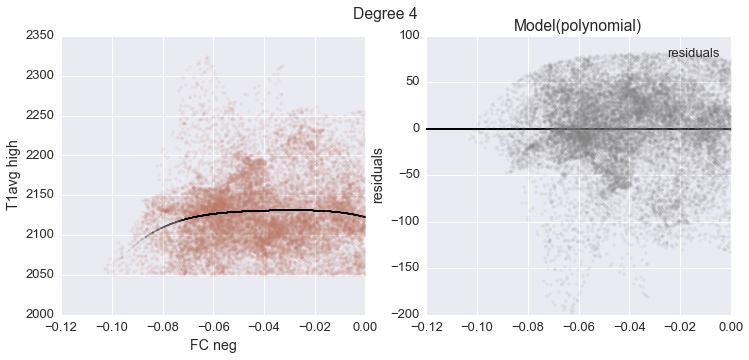

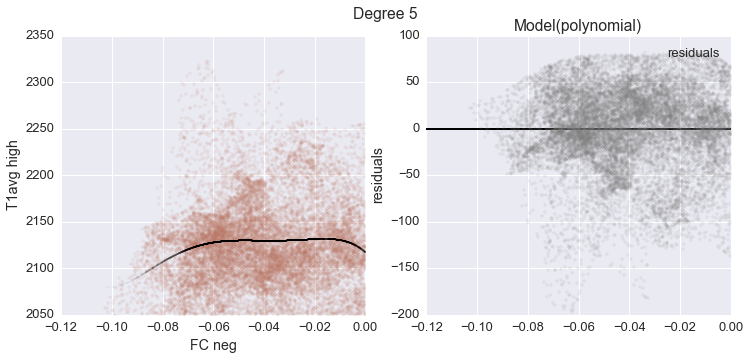

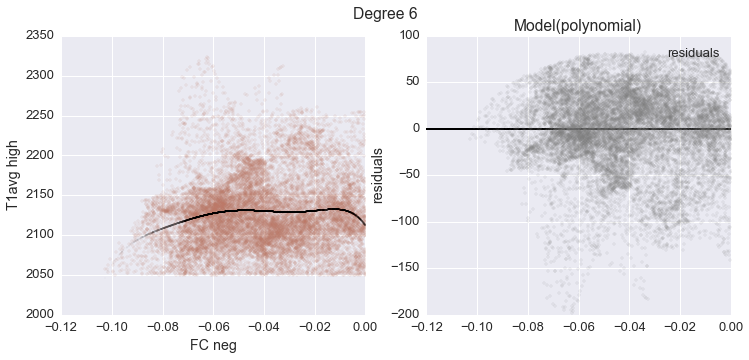

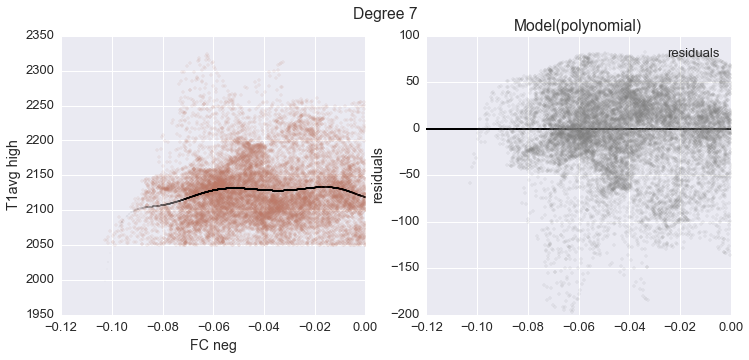

In [39]:
res_neg_high = []
for p in range(8):
    
    mod_neg_high = fit_simple(lmfit.models.PolynomialModel(degree=p), 
                        x=scatter_embed_neg_zoom[:,0], y=scatter_t1avg_neg_zoom,
                        xlabel='FC neg',
                        ylabel='T1avg high',
                         label='Degree %i'%p, 
                        color=colors[5])
    res_neg_high.append(mod_neg_high)

Step form linear
BIC 123297.301548
AIC 123266.483354

Step form atan
BIC 123322.92319
AIC 123292.104995

Step form logistic
BIC 123304.399238
AIC 123273.581043

Step form erf
BIC 123298.304046
AIC 123267.485852



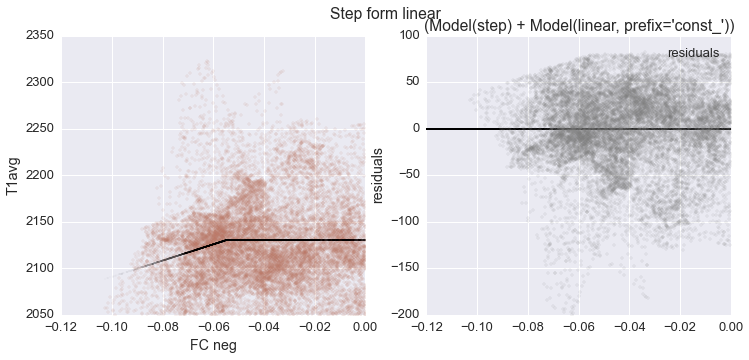

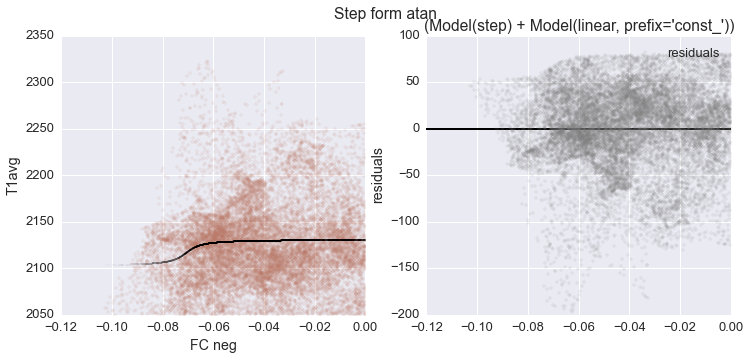

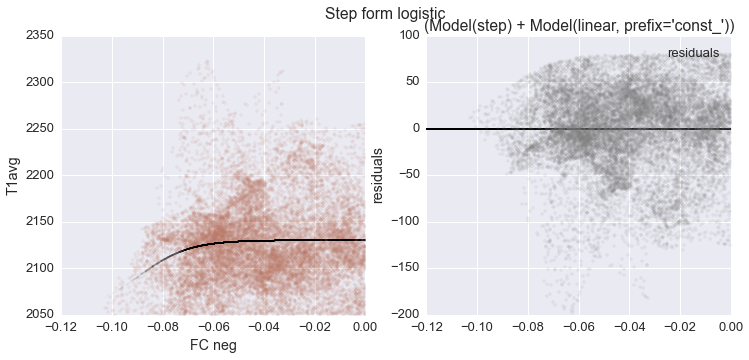

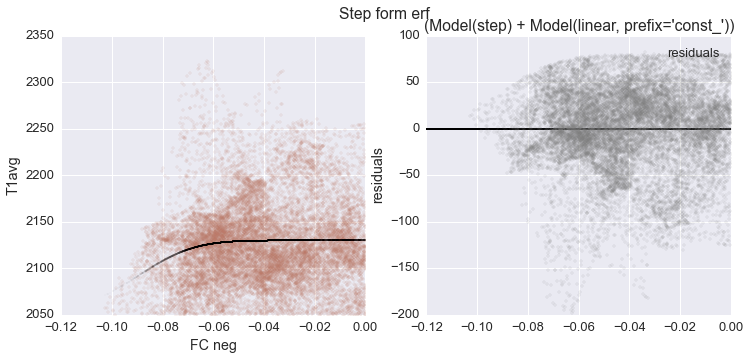

In [40]:
for f in ['linear', 'atan', 'logistic', 'erf']:

    mod_neg_high = fit_composite_const(lmfit.models.StepModel(form=f), 
                                    x=scatter_embed_neg_zoom[:,0], y=scatter_t1avg_neg_zoom,
                                    xlabel='FC neg',
                                    ylabel='T1avg',
                                    label='Step form %s'%f, 
                                    color=colors[5])
    
    res_neg_high.append(mod_neg_high)

### Compare different models

In [41]:
names = ['Poly %i'%x for x in range(8)]+['Step %s'%y for y in ['linear', 'atan', 'logistic', 'erf']]

df = pd.DataFrame()

df['Value']=[m.bic for m in res_pos]+[m.aic for m in res_pos]
df['Model']=2*names
df['Criterion']=len(res_pos)*['BIC pos']+len(res_pos)*['AIC pos']


df2 = pd.DataFrame()
df2['Value']=[m.bic for m in res_neg_high]+[m.aic for m in res_neg_high]
df2['Model']=2*names
df2['Criterion']=len(res_neg_high)*['BIC neg/high']+len(res_neg_high)*['AIC neg/high']

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


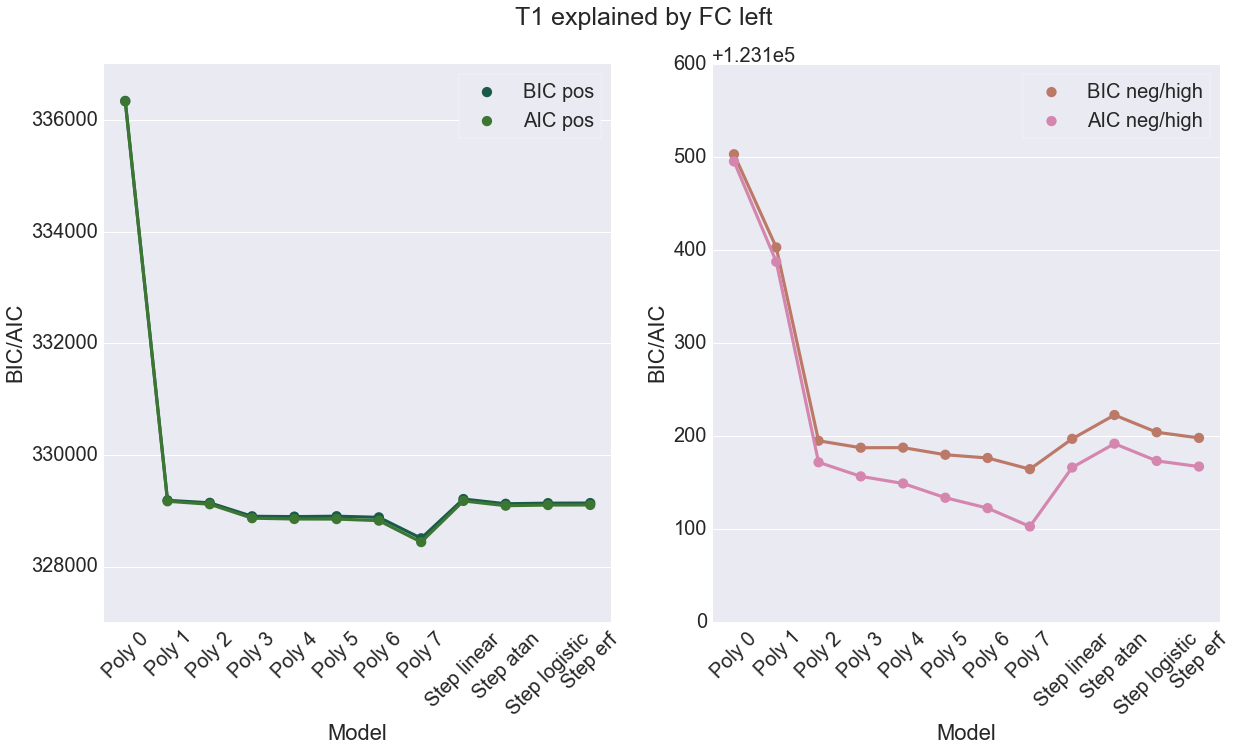

In [42]:
sns.set_context('notebook', font_scale=2)

fig=plt.figure(figsize=(20,10))
fig.add_subplot(121)
sns.pointplot(data=df, x='Model', y='Value', hue='Criterion', linewidth=0,
             palette=[colors[2], colors[3]])
plt.legend(loc=1, frameon=True)
plt.ylabel('BIC/AIC')
plt.xticks(rotation=45)

fig.add_subplot(122)
sns.pointplot(data=df2, x='Model', y='Value', hue='Criterion', linewidth=0,
             palette=[colors[5], colors[6]])
plt.legend(loc=1, frameon=True)
plt.ylabel('BIC/AIC')
plt.xticks(rotation=45)

if hemi=='lh':
    hemistring='left'
elif hemi=='rh':
    hemistring='right'
else:
    hemistring='both'
plt.suptitle('T1 explained by FC %s'%hemistring, fontsize=25)

In [ ]:
df_corr = pd.DataFrame()
df_corr['Model'] = 2*names[1:]
df_corr['FC'] = (len(names)-1)*['pos']+(len(names)-1)*['neg/high']
df_corr['Fit'] = [stats.pearsonr(j.best_fit, scatter_t1avg_pos)[0] for j in res_pos[1:]] + [stats.pearsonr(k.best_fit, scatter_t1avg_neg_zoom)[0] for k in res_neg_high[1:]]

In [ ]:
sns.set_context('notebook', font_scale=1.5)

fig=plt.figure(figsize=(10,5))
sns.pointplot(data=df_corr, x='Model', y='Fit', hue='FC', 
             palette=[colors[3], colors[5]])
plt.legend(loc=4, frameon=True)
plt.ylabel('Pearson r')
plt.xticks(rotation=45);